# Artificial Neural Network Build

Lets build an artificial neural network

## Imports

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from config import MAIN_PALETTE

sns.set_theme(context='notebook', style='whitegrid', palette='bright', font='sans-serif', 
                  font_scale=1, color_codes=True, rc=None)
plt.rcParams["figure.figsize"] = (15,5)

In [56]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

## Getting data

In [57]:
data_path = '../data/dataset_cleaned.csv'
data = pd.read_csv('../data/dataset_cleaned.csv')

data.head()

,current_202,current_203,current_204,current_205,current_206,current_207,current_208,current_209,current_210,current_211,...,volt_793,volt_794,volt_795,volt_796,volt_797,volt_798,volt_799,volt_800,volt_801,state
0,0.682195,0.681640,0.681171,0.680729,0.680484,0.680928,0.682209,0.683694,0.684659,0.684947,...,0.367278,0.364093,0.402194,0.448523,0.450469,0.356803,0.302953,0.274347,0.187275,0
1,0.678763,0.678157,0.678000,0.678474,0.679554,0.680862,0.681912,0.682436,0.682467,0.682152,...,0.261276,0.271836,0.308600,0.356592,0.389055,0.355631,0.369090,0.410403,0.323149,0
2,0.692640,0.692082,0.691222,0.690065,0.688761,0.687545,0.686558,0.685798,0.685337,0.685325,...,0.297014,0.288137,0.302547,0.330311,0.342483,0.289035,0.271342,0.278585,0.217022,0
3,0.684550,0.684634,0.684632,0.684461,0.683996,0.683266,0.682420,0.681621,0.680988,0.680663,...,0.276489,0.310451,0.382017,0.485955,0.568265,0.505633,0.450684,0.407461,0.272598,0
4,0.670445,0.669661,0.668889,0.668196,0.667722,0.667399,0.667360,0.668124,0.669890,0.672200,...,0.381110,0.376050,0.407861,0.460601,0.481486,0.389891,0.325563,0.281171,0.180556,0


In [58]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

X

,current_202,current_203,current_204,current_205,current_206,current_207,current_208,current_209,current_210,current_211,...,volt_792,volt_793,volt_794,volt_795,volt_796,volt_797,volt_798,volt_799,volt_800,volt_801
0,0.682195,0.681640,0.681171,0.680729,0.680484,0.680928,0.682209,0.683694,0.684659,0.684947,...,0.406982,0.367278,0.364093,0.402194,0.448523,0.450469,0.356803,0.302953,0.274347,0.187275
1,0.678763,0.678157,0.678000,0.678474,0.679554,0.680862,0.681912,0.682436,0.682467,0.682152,...,0.273656,0.261276,0.271836,0.308600,0.356592,0.389055,0.355631,0.369090,0.410403,0.323149
2,0.692640,0.692082,0.691222,0.690065,0.688761,0.687545,0.686558,0.685798,0.685337,0.685325,...,0.317711,0.297014,0.288137,0.302547,0.330311,0.342483,0.289035,0.271342,0.278585,0.217022
3,0.684550,0.684634,0.684632,0.684461,0.683996,0.683266,0.682420,0.681621,0.680988,0.680663,...,0.265779,0.276489,0.310451,0.382017,0.485955,0.568265,0.505633,0.450684,0.407461,0.272598
4,0.670445,0.669661,0.668889,0.668196,0.667722,0.667399,0.667360,0.668124,0.669890,0.672200,...,0.415693,0.381110,0.376050,0.407861,0.460601,0.481486,0.389891,0.325563,0.281171,0.180556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.654703,0.654392,0.654158,0.654086,0.654370,0.655265,0.656777,0.658473,0.659922,0.661014,...,0.085348,0.067686,0.062863,0.078773,0.102914,0.117693,0.097859,0.085690,0.079646,0.061386
475,0.691066,0.693366,0.695296,0.696822,0.698040,0.699004,0.699738,0.700179,0.700178,0.699792,...,0.243962,0.250543,0.279990,0.333953,0.393716,0.419058,0.355549,0.327488,0.312347,0.211438
476,0.716938,0.715976,0.714911,0.713888,0.712956,0.711976,0.710904,0.709947,0.709364,0.709295,...,0.269906,0.262787,0.261464,0.268023,0.270470,0.250558,0.187487,0.160850,0.156544,0.107699
477,0.671696,0.671971,0.672160,0.672397,0.672658,0.672790,0.672632,0.672193,0.671623,0.670950,...,0.143442,0.139477,0.127960,0.122262,0.118875,0.110584,0.083422,0.073359,0.071337,0.047548


To get the best training and testing datasets, we're going to balance the amount of each state.
We're going to use:

Training:
120 from state 0
85 from state 1
85 from state 2

In [59]:
df_0 = data.query('state == 0')
df_1 = data.query('state == 1')
df_2 = data.query('state == 2')

print('State 0 shape:', df_0.shape)
print('State 1 shape:', df_1.shape)
print('State 2 shape:', df_2.shape)

State 0 shape: (288, 1201)
State 1 shape: (97, 1201)
State 2 shape: (94, 1201)


Get X_train and X_test

In [60]:
state0_train_size = 125
state1_train_size = 85
state2_train_size = 85

# state 0
X_train_0 = df_0.iloc[:state0_train_size, :]
X_test_0 = df_0.iloc[state0_train_size:, :]

y_train_0 = df_0.iloc[:state0_train_size, -1]
y_test_0 = df_0.iloc[state0_train_size:, -1]

# state 1
X_train_1 = df_1.iloc[:state1_train_size, :]
X_test_1 = df_1.iloc[state1_train_size:, :]

y_train_1 = df_1.iloc[:state1_train_size, -1]
y_test_1 = df_1.iloc[state1_train_size:, -1]

# state 2
X_train_2 = df_2.iloc[:state2_train_size, :]
X_test_2 = df_2.iloc[state2_train_size:, :]

y_train_2 = df_2.iloc[:state2_train_size, -1]
y_test_2 = df_2.iloc[state2_train_size:, -1]

# Concatenate
X_train = pd.concat([X_train_0, X_train_1, X_train_2])
X_test = pd.concat([X_test_0, X_test_1, X_test_2])

y_train = pd.concat([y_train_0, y_train_1, y_train_2])
y_test = pd.concat([y_test_0, y_test_1, y_test_2])

print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
print("==========")
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)

y_test_2


X_test shape (184, 1201)
y_test shape (184,)
X_train shape (295, 1201)
y_train shape (295,)


470    2
471    2
472    2
473    2
474    2
475    2
476    2
477    2
478    2
Name: state, dtype: int64

In [61]:
X_train

,current_202,current_203,current_204,current_205,current_206,current_207,current_208,current_209,current_210,current_211,...,volt_793,volt_794,volt_795,volt_796,volt_797,volt_798,volt_799,volt_800,volt_801,state
0,0.682195,0.681640,0.681171,0.680729,0.680484,0.680928,0.682209,0.683694,0.684659,0.684947,...,0.367278,0.364093,0.402194,0.448523,0.450469,0.356803,0.302953,0.274347,0.187275,0
1,0.678763,0.678157,0.678000,0.678474,0.679554,0.680862,0.681912,0.682436,0.682467,0.682152,...,0.261276,0.271836,0.308600,0.356592,0.389055,0.355631,0.369090,0.410403,0.323149,0
2,0.692640,0.692082,0.691222,0.690065,0.688761,0.687545,0.686558,0.685798,0.685337,0.685325,...,0.297014,0.288137,0.302547,0.330311,0.342483,0.289035,0.271342,0.278585,0.217022,0
3,0.684550,0.684634,0.684632,0.684461,0.683996,0.683266,0.682420,0.681621,0.680988,0.680663,...,0.276489,0.310451,0.382017,0.485955,0.568265,0.505633,0.450684,0.407461,0.272598,0
4,0.670445,0.669661,0.668889,0.668196,0.667722,0.667399,0.667360,0.668124,0.669890,0.672200,...,0.381110,0.376050,0.407861,0.460601,0.481486,0.389891,0.325563,0.281171,0.180556,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,0.700283,0.701001,0.701229,0.701127,0.700915,0.700716,0.700710,0.700854,0.700750,0.700235,...,0.160885,0.174962,0.209262,0.245508,0.258957,0.223890,0.225651,0.280271,0.285810,2
466,0.693763,0.694442,0.695615,0.697754,0.700593,0.703291,0.705338,0.706631,0.707332,0.707802,...,0.492045,0.491282,0.453160,0.393129,0.308887,0.198685,0.149238,0.125311,0.074611,2
467,0.686474,0.685674,0.684757,0.683837,0.683164,0.682842,0.682819,0.683196,0.683973,0.684908,...,0.171276,0.188868,0.235896,0.324066,0.461164,0.508763,0.510587,0.458503,0.272390,2
468,0.653381,0.654533,0.656147,0.657785,0.659059,0.659839,0.660204,0.660300,0.660191,0.659892,...,0.151263,0.158412,0.186152,0.202066,0.179934,0.118501,0.085939,0.069742,0.040592,2


In [62]:
X_test

,current_202,current_203,current_204,current_205,current_206,current_207,current_208,current_209,current_210,current_211,...,volt_793,volt_794,volt_795,volt_796,volt_797,volt_798,volt_799,volt_800,volt_801,state
125,0.691919,0.691857,0.691331,0.690484,0.689532,0.688726,0.688130,0.687714,0.687552,0.687673,...,0.314036,0.318342,0.356268,0.401804,0.407339,0.316755,0.256458,0.221252,0.148448,0
126,0.688282,0.687451,0.686783,0.686297,0.686016,0.686165,0.687262,0.689330,0.691714,0.693787,...,0.277765,0.266636,0.272530,0.298734,0.329949,0.307095,0.308849,0.322219,0.246138,0
127,0.703717,0.703216,0.703154,0.703356,0.703613,0.703891,0.704373,0.705145,0.705897,0.706303,...,0.232290,0.283721,0.357671,0.427205,0.455655,0.389299,0.366152,0.376777,0.287012,0
128,0.702957,0.704118,0.705578,0.706766,0.707387,0.707607,0.707736,0.707861,0.707882,0.707653,...,0.347294,0.338249,0.361233,0.389561,0.377679,0.282076,0.228494,0.216340,0.171813,0
129,0.710469,0.708822,0.707448,0.706760,0.706676,0.706796,0.706901,0.706971,0.707142,0.707647,...,0.310868,0.323062,0.364767,0.443387,0.525665,0.484873,0.442928,0.400778,0.262214,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,0.654703,0.654392,0.654158,0.654086,0.654370,0.655265,0.656777,0.658473,0.659922,0.661014,...,0.067686,0.062863,0.078773,0.102914,0.117693,0.097859,0.085690,0.079646,0.061386,2
475,0.691066,0.693366,0.695296,0.696822,0.698040,0.699004,0.699738,0.700179,0.700178,0.699792,...,0.250543,0.279990,0.333953,0.393716,0.419058,0.355549,0.327488,0.312347,0.211438,2
476,0.716938,0.715976,0.714911,0.713888,0.712956,0.711976,0.710904,0.709947,0.709364,0.709295,...,0.262787,0.261464,0.268023,0.270470,0.250558,0.187487,0.160850,0.156544,0.107699,2
477,0.671696,0.671971,0.672160,0.672397,0.672658,0.672790,0.672632,0.672193,0.671623,0.670950,...,0.139477,0.127960,0.122262,0.118875,0.110584,0.083422,0.073359,0.071337,0.047548,2


## Build model

### Useful imports

In [63]:
from sklearn.metrics import r2_score

Making the ANN

In [64]:
ann = MLPClassifier(
    hidden_layer_sizes=(150, 300),
    max_iter=300,
    tol=0.0000000001,
    learning_rate_init=0.1,
    solver='sgd',
    activation='logistic',
    learning_rate='constant',
    verbose=True,
    early_stopping=True, # needed to get validation_scores stats
)

Train the model

In [65]:
ann.fit(X_train, y_train)

Iteration 1, loss = 1.14881186
Validation score: 0.166667
Iteration 2, loss = 2.81534751
Validation score: 0.633333
Iteration 3, loss = 4.35513255
Validation score: 0.200000
Iteration 4, loss = 1.60165055


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Validation score: 0.633333
Iteration 5, loss = 1.41359313
Validation score: 0.166667
Iteration 6, loss = 1.29792548
Validation score: 0.200000


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 7, loss = 1.26514073
Validation score: 0.633333
Iteration 8, loss = 1.14070541


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Validation score: 0.633333
Iteration 9, loss = 1.06746397
Validation score: 0.800000
Iteration 10, loss = 1.07510724


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Validation score: 0.166667
Iteration 11, loss = 1.07716923
Validation score: 0.633333
Iteration 12, loss = 1.05537471
Validation score: 0.633333
Iteration 13, loss = 1.06679010
Validation score: 0.833333
Iteration 14, loss = 1.02023980
Validation score: 0.833333
Iteration 15, loss = 1.00051628
Validation score: 0.833333
Iteration 16, loss = 0.97252739
Validation score: 0.633333
Iteration 17, loss = 0.98696828
Validation score: 0.833333


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 18, loss = 0.86379683
Validation score: 0.833333
Iteration 19, loss = 0.78834795
Validation score: 0.833333
Iteration 20, loss = 0.70832171
Validation score: 0.833333
Iteration 21, loss = 0.62753575
Validation score: 0.966667


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


Iteration 22, loss = 0.56283171
Validation score: 0.833333
Iteration 23, loss = 0.54651801
Validation score: 0.833333
Iteration 24, loss = 0.48082469
Validation score: 0.833333
Iteration 25, loss = 0.45882559
Validation score: 0.833333
Iteration 26, loss = 0.46220739
Validation score: 0.833333
Iteration 27, loss = 0.42175935
Validation score: 0.966667


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature na

Iteration 28, loss = 0.38323673
Validation score: 0.900000
Iteration 29, loss = 0.36450799
Validation score: 0.966667
Iteration 30, loss = 0.32574960
Validation score: 0.766667
Iteration 31, loss = 0.46206400
Validation score: 0.366667
Iteration 32, loss = 1.05422560
Validation score: 1.000000
Iteration 33, loss = 0.26999770
Validation score: 0.966667


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature na

Iteration 34, loss = 0.28439158
Validation score: 0.400000
Iteration 35, loss = 0.65294340
Validation score: 0.366667
Iteration 36, loss = 0.81124468
Validation score: 0.533333
Iteration 37, loss = 0.38839329
Validation score: 1.000000
Iteration 38, loss = 0.23027594
Validation score: 1.000000
Iteration 39, loss = 0.17696327
Validation score: 1.000000


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature na

Iteration 40, loss = 0.15490030
Validation score: 1.000000
Iteration 41, loss = 0.13755279
Validation score: 0.966667
Iteration 42, loss = 0.12068685
Validation score: 1.000000
Iteration 43, loss = 0.10072251
Validation score: 1.000000
Validation score did not improve more than tol=0.000000 for 10 consecutive epochs. Stopping.


/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/home/pedro/Brincadeiras/facul/ia/ann-engine/venv/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


MLPClassifier(activation='logistic', early_stopping=True,
              hidden_layer_sizes=(150, 300), learning_rate_init=0.1,
              max_iter=300, solver='sgd', tol=1e-10, verbose=True)

Check if the model is well fitted.

<AxesSubplot: xlabel='iterations', ylabel='loss'>

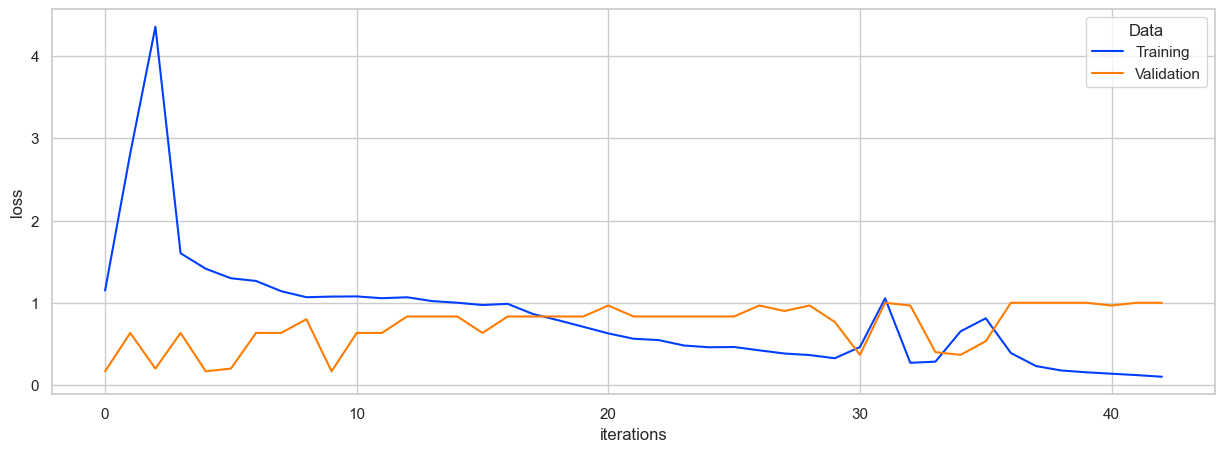

In [66]:
loss_train = ann.loss_curve_
loss_validation = ann.validation_scores_

loss_train_df = pd.DataFrame(
    {
        'loss': loss_train,
        'iterations': [x for x in range(len(loss_train))]
    }
)
loss_train_df['Data'] = 'Training'

loss_validation_df = pd.DataFrame(
    {
        'loss': loss_validation,
        'iterations': [x for x in range(len(loss_validation))]
    }
)
loss_validation_df['Data'] = 'Validation'

loss_df = pd.concat([loss_train_df, loss_validation_df])

sns.lineplot(data=loss_df, x='iterations', y='loss', hue='Data')

The plot showed that the model is well fitted as the loss from validation and training datasets are nearly the same in the end of fitting.

Get the score

In [67]:
score = ann.score(X_test, y_test)

print('%.2f' %(score*100) + '%')

100.00%


Predict the probability for each state

In [68]:
print("Probability of a random sample of state 0:", np.round(ann.predict_proba(X_test_0[:1]), 4) )
print("Probability of a random sample of state 1:", np.round(ann.predict_proba(X_test_1[:1]), 4) )
print("Probability of a random sample of state 2:", np.round(ann.predict_proba(X_test_2[:1]), 4) )

Probability of a random sample of state 0: [[6.837e-01 1.000e-04 3.162e-01]]
Probability of a random sample of state 1: [[1.000e-04 9.416e-01 5.830e-02]]
Probability of a random sample of state 2: [[0.2831 0.0029 0.714 ]]
